In [168]:
! pip install tensorflow-gpu

In [169]:
! pip install keras

In [170]:
! pip install pandas

In [171]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
GPU is available


In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
file="/content/drive/My Drive/Colab Notebooks/Concrete_Strength -1.csv"


In [174]:
import pandas as pd
df=pd.read_csv(file)
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [175]:
df.shape

(1030, 9)

In [11]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Compressive Strength'],
      dtype='object')

In [12]:
df.isnull().sum()

Cement                  0
Blast Furnace Slag      0
Fly Ash                 0
Water                   0
Superplasticizer        0
Coarse Aggregate        0
Fine Aggregate          0
Age                     0
Compressive Strength    0
dtype: int64

In [13]:
df.nunique()

Cement                  278
Blast Furnace Slag      185
Fly Ash                 156
Water                   195
Superplasticizer        111
Coarse Aggregate        284
Fine Aggregate          302
Age                      14
Compressive Strength    845
dtype: int64

In [14]:
df.dtypes

Cement                  float64
Blast Furnace Slag      float64
Fly Ash                 float64
Water                   float64
Superplasticizer        float64
Coarse Aggregate        float64
Fine Aggregate          float64
Age                       int64
Compressive Strength    float64
dtype: object

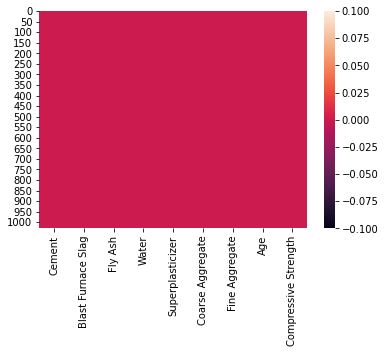

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(df.isnull())

In [16]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Compressive Strength'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


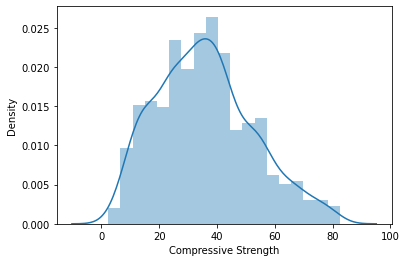

In [17]:
sns.distplot(df['Compressive Strength'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


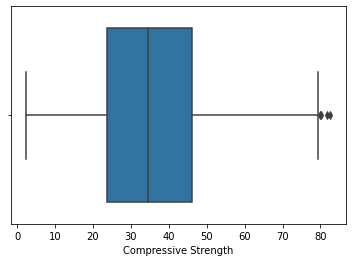

In [18]:
sns.boxplot(df['Compressive Strength'])

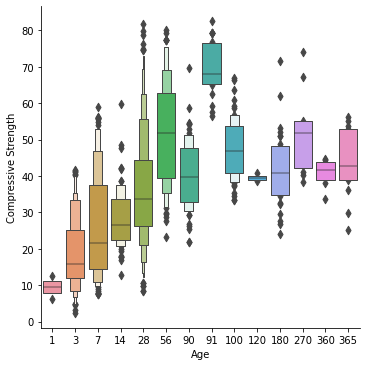

In [27]:
sns.catplot(x='Age', y='Compressive Strength', data=df, kind='boxen')

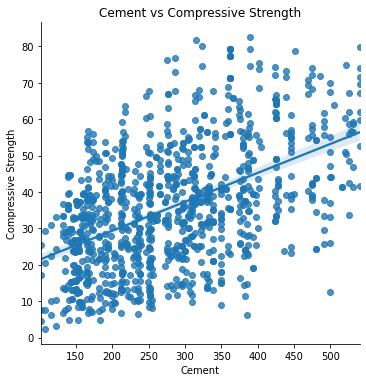

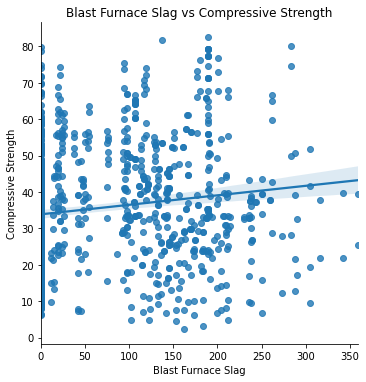

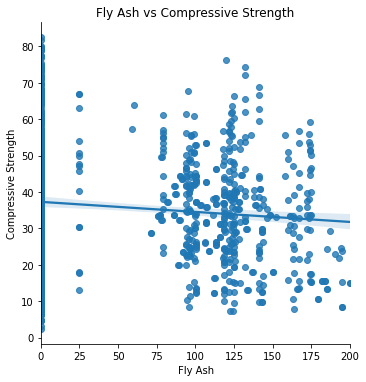

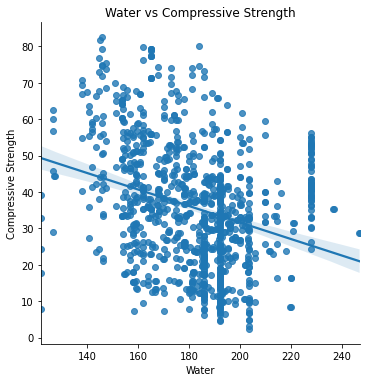

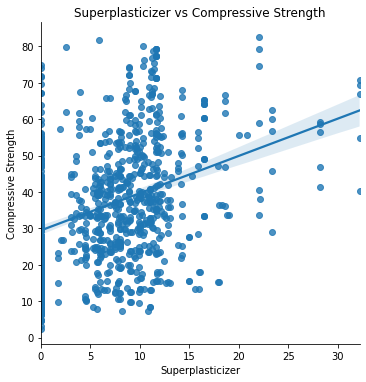

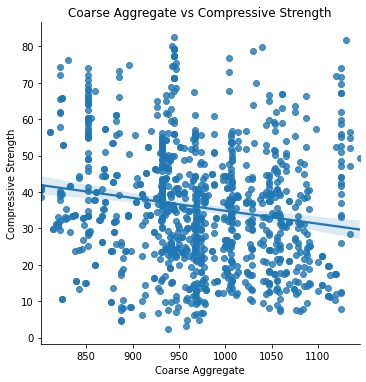

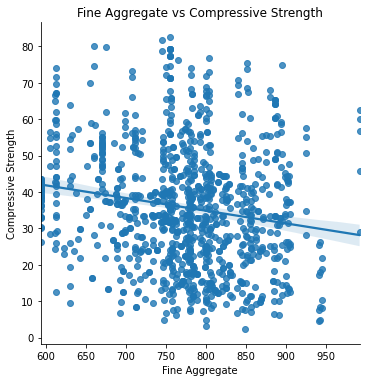

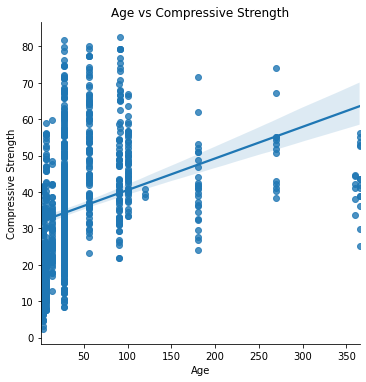

In [28]:
cols=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Age']
for i in cols:
  sns.lmlot(x=i, y='Compressive Strength', data=df)
  plt.title('%s vs %s' %(i, 'Compressive Strength'))

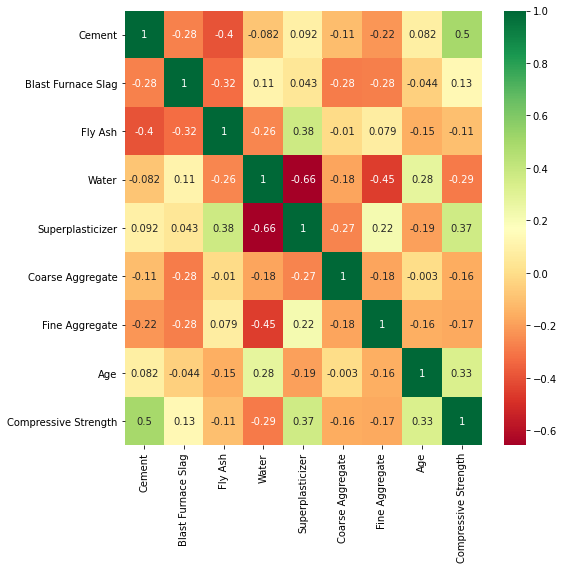

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

In [38]:
X = df.drop('Compressive Strength',axis=1)
y = df['Compressive Strength']

In [39]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [40]:
print(selection.feature_importances_)

[0.25988542 0.08722784 0.0349892  0.08364867 0.09678282 0.03230414
 0.04239584 0.36276606]


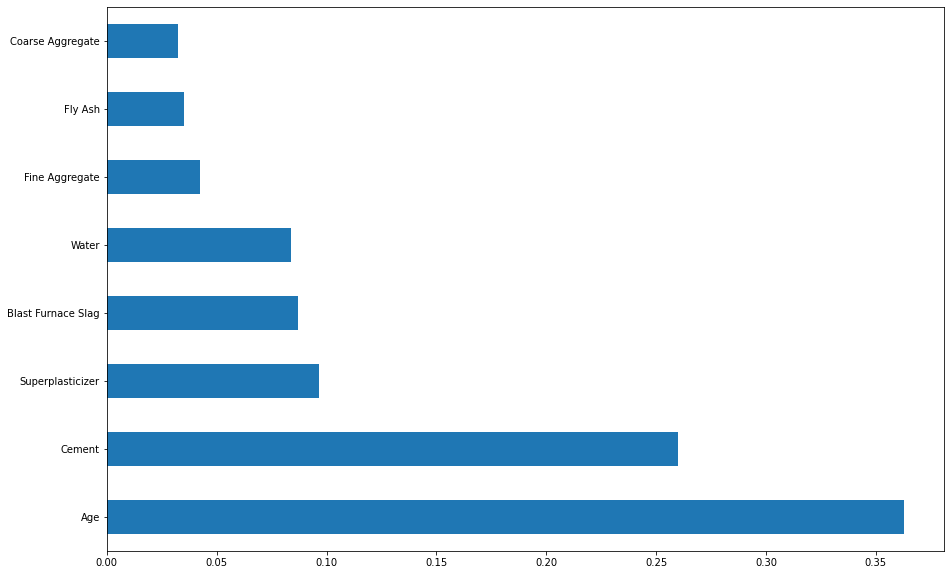

In [41]:
plt.figure(figsize=(15,10))
feature_imp=pd.Series(selection.feature_importances_, index=X.columns)
feature_imp.nlargest(15).plot(kind='barh')

In [42]:

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [177]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [45]:
X_train.shape

(721, 8)

In [46]:
X_test.shape

(309, 8)

In [47]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6232763845604508

In [52]:
algo=[]
value=[]
def cross_val_score_model(model,name):
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=10)
    cv_score=cross_val_score(model,X,y,cv=cv).mean()
    print('CV_Score' + ' '+ str(name) +': '+ str(cv_score))
    algo.append(name)
    value.append(cv_score)
 
cross_val_score_model(Lasso(),'Lasso')
cross_val_score_model(Ridge(),'Ridge')
cross_val_score_model(KNeighborsRegressor(),'KNeighborsRegressor')
cross_val_score_model(LinearRegression(),'LinearRegression')
cross_val_score_model(DecisionTreeRegressor(),'DecisionTreeRegressor')
cross_val_score_model(RandomForestRegressor(),'RandomForestRegressor')
cross_val_score_model(XGBRegressor(),'XGBRegressor')

CV_Score Lasso: 0.613325554121765
CV_Score Ridge: 0.6128504148537173
CV_Score KNeighborsRegressor: 0.6925729612473251
CV_Score LinearRegression: 0.612849943129472
CV_Score DecisionTreeRegressor: 0.8228930321501171
CV_Score RandomForestRegressor: 0.9072255110355275
[04:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CV_Score XGBRegressor: 0.904784922119487


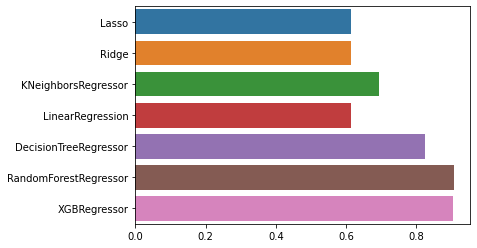

In [53]:
sns.barplot(x=value,y=algo)
plt.show()

In [54]:
pd.DataFrame({'Model':algo,'Score':value})

,Model,Score
0,Lasso,0.613326
1,Ridge,0.612850
2,KNeighborsRegressor,0.692573
3,LinearRegression,0.612850
4,DecisionTreeRegressor,0.822893
5,RandomForestRegressor,0.907226
6,XGBRegressor,0.904785


In [56]:
model_params={
    'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators' :[100,300,500,800],
            'max_features' : ['auto', 'sqrt'],
            'max_depth' : [1,5,10,15,20,25,30,35,40,50]
        }
    },
    'XGBRegressor':{
        'model':XGBRegressor(),
        'params':{
            'n_estimators' : [100, 200,500,800],
            'max_depth' : [1,2, 3, 5, 10, 15,20,30,40],
            'booster':['gbtree','gblinear'],
            'learning_rate':[0.05,0.1,0.15,0.20],
            'min_child_weight':[1,2,3,4],
            'base_score':[0.25,0.5,0.75,1]
        }
    }

}

In [57]:
scores=[]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=10)
for model_name, mp in model_params.items():
    random_clf=RandomizedSearchCV(mp['model'],mp['params'],scoring='neg_mean_squared_error', n_iter = 5, cv = cv, verbose=2, n_jobs = 1, return_train_score=False)
    random_clf.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':random_clf.best_score_,
        'best param':random_clf.best_params_,
        'best estimator':random_clf.best_estimator_
    })

ds=pd.DataFrame(scores,columns=['model','best param'])
ds

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=800, max_features=auto, max_depth=5 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_estimators=800, max_features=auto, max_depth=5, total=   1.9s
[CV] n_estimators=800, max_features=auto, max_depth=5 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] . n_estimators=800, max_features=auto, max_depth=5, total=   1.9s
[CV] n_estimators=800, max_features=auto, max_depth=5 ................
[CV] . n_estimators=800, max_features=auto, max_depth=5, total=   1.9s
[CV] n_estimators=800, max_features=auto, max_depth=5 ................
[CV] . n_estimators=800, max_features=auto, max_depth=5, total=   1.9s
[CV] n_estimators=800, max_features=auto, max_depth=5 ................
[CV] . n_estimators=800, max_features=auto, max_depth=5, total=   1.9s
[CV] n_estimators=300, max_features=sqrt, max_depth=5 ................
[CV] . n_estimators=300, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=300, max_features=sqrt, max_depth=5 ................
[CV] . n_estimators=300, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=300, max_features=sqrt, max_depth=5 ................
[CV] . n_estimators=300, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=300, max_features=sqrt, max_depth=5 ................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   16.7s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.2, booster=gbtree, base_score=0.25 
[04:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.2, booster=gbtree, base_score=0.25, total=   1.4s
[CV] n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.2, booster=gbtree, base_score=0.25 
[04:39:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.2, booster=gbtree, base_score=0.25, total=   1.4s
[CV] n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.2, booster=gbtree, base_score=0.25 
[04:39:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.2, booster=gbtree, base_score=0.25, total=   1.5s
[CV] n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.2, booster=gbtree, base_score=0.25 
[04:39:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.2, booster=gbtree, base_score=0.25, total=   1.3s
[CV] n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.2, booster=gbtree, base_score=0.25 
[04:39:25] WARNING: /workspace/src/objective/re

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   12.7s finished


,model,best param
0,RandomForestRegressor,"{'n_estimators': 100, 'max_features': 'auto', ..."
1,XGBRegressor,"{'n_estimators': 500, 'min_child_weight': 4, '..."


In [58]:

def display_text_max_col_width(df, width):
    with pd.option_context('display.max_colwidth', width):
        print(df)

display_text_max_col_width(ds['best param'], 800)

0                                                                  {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 25}
1    {'n_estimators': 500, 'min_child_weight': 4, 'max_depth': 30, 'learning_rate': 0.2, 'booster': 'gbtree', 'base_score': 0.25}
Name: best param, dtype: object


In [59]:
cross_val_score_model(RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=25),'RandomForestRegressor_best')
cross_val_score_model(XGBRegressor(n_estimators=500, min_child_weight= 4, max_depth=30, learning_rate=0.2, booster='gbtree', base_score=0.25),'XGBRegressor_best')

CV_Score RandomForestRegressor_best: 0.9089874640808852
[04:41:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:41:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CV_Score XGBRegressor_best: 0.9241856167525555


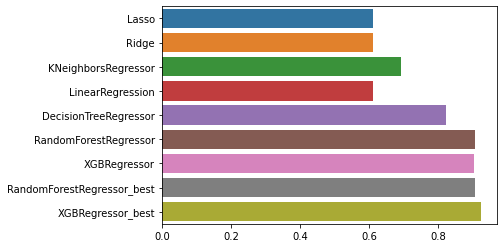

In [60]:
sns.barplot(x=value,y=algo)
plt.show()

In [61]:
pd.DataFrame({'Model':algo,'Score':value})

,Model,Score
0,Lasso,0.613326
1,Ridge,0.612850
2,KNeighborsRegressor,0.692573
3,LinearRegression,0.612850
4,DecisionTreeRegressor,0.822893
5,RandomForestRegressor,0.907226
6,XGBRegressor,0.904785
7,RandomForestRegressor_best,0.908987
8,XGBRegressor_best,0.924186


In [77]:
from sklearn.metrics import r2_score
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_y_pred=xgb.predict(X_test)
score=r2_score(y_test,xgb_y_pred)
score

[04:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9020666584241684

In [78]:
from sklearn.metrics import r2_score
xgb_best=XGBRegressor(n_estimators=1000, min_child_weight= 2, max_depth=2, learning_rate=0.2, booster='gbtree', base_score=0.5)
xgb_best.fit(X_train,y_train)
xgb_best_y_pred=xgb_best.predict(X_test)
score1=r2_score(y_test,xgb_best_y_pred)
score1

[04:53:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9398995633600171

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


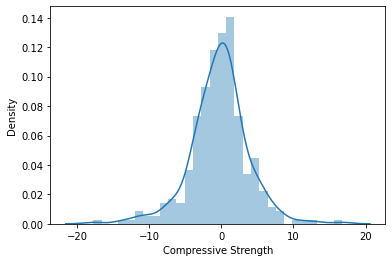

In [79]:
sns.distplot(y_test-xgb_best_y_pred)

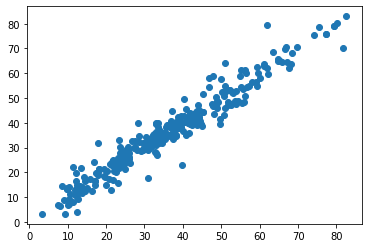

In [80]:

plt.scatter(y_test,xgb_best_y_pred)

In [87]:
df.iloc[529]

Cement                  359.00
Blast Furnace Slag       19.00
Fly Ash                 141.00
Water                   154.00
Superplasticizer         10.90
Coarse Aggregate        942.00
Fine Aggregate          801.00
Age                      56.00
Compressive Strength     68.75
Name: 529, dtype: float64

In [86]:
a=[[359,19,141,154,10.9,942,801,56]]
a=s.transform(a)
b=xgb_best.predict(a)
b

array([66.33718], dtype=float32)

ANN DROPOUT

In [178]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [179]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
import os
import cv2

In [109]:
model1 = Sequential()

model1.add(Dense(128,activation  = 'relu',input_dim =8))
model1.add(Dropout(0.3))
model1.add(Dense(64,activation  = 'relu'))
model1.add(Dense(32,activation  = 'relu'))
model1.add(Dense(1))

model1.compile(optimizer = "adam", loss = "mean_squared_error",metrics=['mse'])
r1=model1.fit(X_train, y_train, epochs=300, batch_size=8,validation_data=(X_test,y_test))

Epoch 1/300
91/91 [==============================] - 0s 5ms/step - loss: 951.7195 - mse: 951.7195 - val_loss: 217.2270 - val_mse: 217.2270
Epoch 2/300
91/91 [==============================] - 0s 4ms/step - loss: 214.1535 - mse: 214.1535 - val_loss: 169.5909 - val_mse: 169.5909
Epoch 3/300
91/91 [==============================] - 0s 4ms/step - loss: 191.5476 - mse: 191.5476 - val_loss: 158.2807 - val_mse: 158.2807
Epoch 4/300
91/91 [==============================] - 0s 4ms/step - loss: 176.0240 - mse: 176.0240 - val_loss: 142.6123 - val_mse: 142.6123
Epoch 5/300
91/91 [==============================] - 0s 4ms/step - loss: 155.9698 - mse: 155.9698 - val_loss: 132.4426 - val_mse: 132.4426
Epoch 6/300
91/91 [==============================] - 0s 4ms/step - loss: 149.0947 - mse: 149.0947 - val_loss: 140.0305 - val_mse: 140.0305
Epoch 7/300
91/91 [==============================] - 0s 4ms/step - loss: 144.8913 - mse: 144.8913 - val_loss: 115.4275 - val_mse: 115.4275
Epoch 8/300
91/91 [========

In [110]:
y_pred_model1=model1.predict(X_test)
y_pred_model1

array([[44.910637 ],
       [ 5.9922323],
       [51.08001  ],
       [38.909054 ],
       [35.337063 ],
       [60.284794 ],
       [43.833694 ],
       [50.85818  ],
       [45.748405 ],
       [34.36788  ],
       [44.234978 ],
       [13.154295 ],
       [20.65496  ],
       [30.74935  ],
       [49.136513 ],
       [25.630817 ],
       [27.463337 ],
       [24.827719 ],
       [23.912266 ],
       [39.909164 ],
       [21.345512 ],
       [62.033443 ],
       [13.02173  ],
       [35.40266  ],
       [39.692356 ],
       [44.99269  ],
       [12.439501 ],
       [25.060436 ],
       [29.69666  ],
       [10.781698 ],
       [25.903023 ],
       [11.148786 ],
       [61.037777 ],
       [17.50221  ],
       [55.41448  ],
       [28.59193  ],
       [35.079105 ],
       [65.69229  ],
       [22.552649 ],
       [37.17647  ],
       [69.487114 ],
       [23.79078  ],
       [27.78891  ],
       [19.435244 ],
       [42.518295 ],
       [41.938057 ],
       [26.076227 ],
       [53.45

In [111]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_model1))

0.9131962111407375


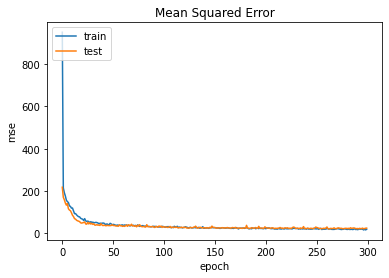

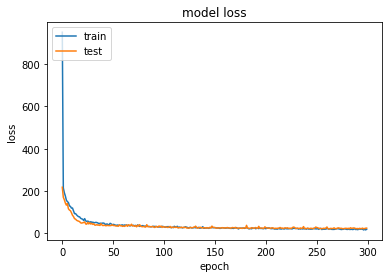

In [112]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(r1.history['mse'])
plt.plot(r1.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r1.history['loss'])
plt.plot(r1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [145]:
df.iloc[400]

Cement                  250.00
Blast Furnace Slag      180.00
Fly Ash                  95.00
Water                   159.00
Superplasticizer          9.50
Coarse Aggregate        860.00
Fine Aggregate          800.00
Age                      28.00
Compressive Strength     67.87
Name: 400, dtype: float64

In [146]:
a=[[250,180,95,159,9.5,860,800,28]]
a=s.transform(a)
b=model1.predict(a)
b

array([[68.591385]], dtype=float32)

ANN_DROPOUT_HYPERTUNING

In [113]:
from keras.wrappers.scikit_learn import KerasRegressor
def create_model():
  model = Sequential()
  model.add(Dense(128,activation  = 'relu',input_dim =8))
  model.add(Dropout(0.3))
  model.add(Dense(64,activation  = 'relu'))
  model.add(Dense(32,activation  = 'relu'))
  model.add(Dense(1))
  
  model.compile(optimizer = "adam", loss = "mean_squared_error",metrics=['mse'])
  return model
model2 = KerasRegressor(build_fn=create_model, verbose=1)

In [195]:
from sklearn.model_selection import GridSearchCV
batch_size = [1,4,8]
epochs = [100,300]
param_grid = dict(batch_size=batch_size, nb_epoch=epochs)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)

# Run the GridSearchCV process
grid_result = grid.fit(X_train, y_train)

721/721 [==============================] - 2s 2ms/step - loss: 357.2960 - mse: 357.2960


In [196]:
print('Best params: ' + str(grid_result.best_params_))

Best params: {'batch_size': 1, 'nb_epoch': 300}


In [197]:
model_hyper = Sequential()

model_hyper.add(Dense(128,activation  = 'relu',input_dim =8))
model_hyper.add(Dropout(0.3))
model_hyper.add(Dense(64,activation  = 'relu'))
model_hyper.add(Dense(32,activation  = 'relu'))
model_hyper.add(Dense(1))

model_hyper.compile(optimizer = "adam", loss = "mean_squared_error",metrics=['mse'])
r_hyper=model_hyper.fit(X_train, y_train, epochs=300, batch_size=1,validation_data=(X_test,y_test))

Epoch 1/300
721/721 [==============================] - 2s 3ms/step - loss: 328.6350 - mse: 328.6350 - val_loss: 152.5131 - val_mse: 152.5131
Epoch 2/300
721/721 [==============================] - 2s 3ms/step - loss: 160.0846 - mse: 160.0846 - val_loss: 135.6476 - val_mse: 135.6476
Epoch 3/300
721/721 [==============================] - 2s 3ms/step - loss: 128.7077 - mse: 128.7077 - val_loss: 97.8120 - val_mse: 97.8120
Epoch 4/300
721/721 [==============================] - 2s 3ms/step - loss: 109.5301 - mse: 109.5301 - val_loss: 82.7808 - val_mse: 82.7808
Epoch 5/300
721/721 [==============================] - 2s 3ms/step - loss: 95.0191 - mse: 95.0191 - val_loss: 76.0522 - val_mse: 76.0522
Epoch 6/300
721/721 [==============================] - 2s 3ms/step - loss: 88.5545 - mse: 88.5545 - val_loss: 63.7183 - val_mse: 63.7183
Epoch 7/300
721/721 [==============================] - 2s 3ms/step - loss: 72.2823 - mse: 72.2823 - val_loss: 52.3984 - val_mse: 52.3984
Epoch 8/300
721/721 [========

In [198]:
y_pred_hyper=model_hyper.predict(X_test)
y_pred_hyper

array([[39.179825 ],
       [ 6.7854066],
       [60.1818   ],
       [36.681866 ],
       [34.95796  ],
       [54.543484 ],
       [46.867977 ],
       [54.632896 ],
       [47.068226 ],
       [38.611122 ],
       [39.384457 ],
       [12.227238 ],
       [22.307993 ],
       [33.511826 ],
       [52.718136 ],
       [28.212297 ],
       [27.577034 ],
       [28.439838 ],
       [30.107967 ],
       [41.419796 ],
       [26.439396 ],
       [64.272156 ],
       [12.078466 ],
       [39.843616 ],
       [36.515766 ],
       [43.055065 ],
       [12.71175  ],
       [28.548542 ],
       [34.19863  ],
       [10.586068 ],
       [34.737885 ],
       [10.35165  ],
       [65.79268  ],
       [19.396896 ],
       [52.420937 ],
       [31.104385 ],
       [39.00024  ],
       [64.493355 ],
       [25.535336 ],
       [37.74762  ],
       [70.95399  ],
       [22.777128 ],
       [31.265236 ],
       [22.306572 ],
       [39.773182 ],
       [44.63707  ],
       [27.11259  ],
       [59.40

In [199]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_hyper))

0.9269099741168522


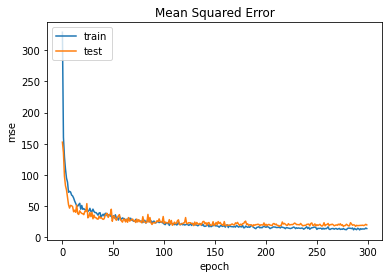

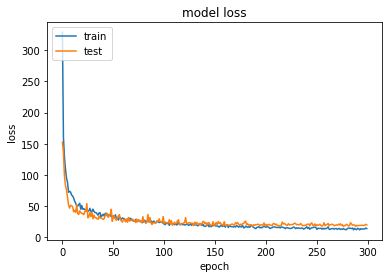

In [200]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(r_hyper.history['mse'])
plt.plot(r_hyper.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r_hyper.history['loss'])
plt.plot(r_hyper.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [201]:
df.iloc[400]

Cement                  250.00
Blast Furnace Slag      180.00
Fly Ash                  95.00
Water                   159.00
Superplasticizer          9.50
Coarse Aggregate        860.00
Fine Aggregate          800.00
Age                      28.00
Compressive Strength     67.87
Name: 400, dtype: float64

In [202]:
a=[[250,180,95,159,9.5,860,800,28]]
a=s.transform(a)
b=model_hyper.predict(a)
b

array([[67.9315]], dtype=float32)

In [203]:
y_test
y_test1=pd.DataFrame(y_test)

y_test1.columns=['y_test']
y_test1=y_test1.reset_index()
y_test1

,index,y_test
0,559,39.44
1,705,3.32
2,500,57.92
3,218,40.39
4,836,33.42
...,...,...
304,80,33.40
305,893,23.52
306,84,28.30
307,742,54.28


In [204]:
y_pred_hyper
y_pred_hyper1=pd.DataFrame(y_pred_hyper)
y_pred_hyper1.columns=['y_pred_hyper']
y_pred_hyper1['index1']=y_test1['index']
y_pred_hyper1

,y_pred_hyper,index1
0,39.179825,559
1,6.785407,705
2,60.181801,500
3,36.681866,218
4,34.957958,836
...,...,...
304,38.762001,80
305,25.197571,893
306,42.507347,84
307,54.877964,742


In [205]:
result1=pd.concat([y_test1,y_pred_hyper1],axis=1)
result1.drop('index1',axis=1)

,index,y_test,y_pred_hyper
0,559,39.44,39.179825
1,705,3.32,6.785407
2,500,57.92,60.181801
3,218,40.39,36.681866
4,836,33.42,34.957958
...,...,...,...
304,80,33.40,38.762001
305,893,23.52,25.197571
306,84,28.30,42.507347
307,742,54.28,54.877964


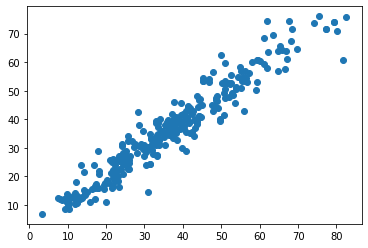

In [206]:
plt.scatter(result1['y_test'],result1['y_pred_hyper'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


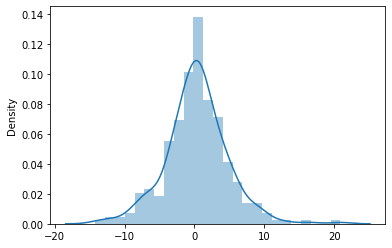

In [207]:
sns.distplot(result1['y_test']-result1['y_pred_hyper'])